# **Machine Learning in Python: Possible extension related to uncertainties**

Using threshy we are going to learn how optimal threshold in 
the classificaton of the value of the threshold and choose the optimal amount of classification. 
The threshy provides the option to change the value of threshold and select the optimal amount for the classification. 
In this Jupyter notebook, we will focus on tthe Possible extension related to the uncertainities using the Iris data set as an example.

## **What is main Focus and Objective?**

Our focus will be on the Binary Classification where we will come up with the ROC Curves. The **ROC curve** summarizes the prediction performance of the binary classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Accuracy)} = \frac{TP + TN}{N}$

At this point the TP holds the value 1 and the modal is assigned it the value 1. 
The TN Value holds the value 0 and the modal assigned the value 0. 
We will also consider the fact the problem of the binary classification has a threshold value of 0.5. This means that the any value which is more than 0.5 will be assigned 1 and less than 0.5 will be assigned 0, but this creates the problme of its one since the values does not give us the optimal accuracy to do that. 
For us to achieve our goal we will have to optimally increase TP and decrease FN. This is because decreasing FN automatically will increase TN. Therefore TN is a false negative. This will therefore be expressed in our curve. 


## **Generation of the Model dataset**
The dataset was for Census Data downloaded from Kaggle.com as from the following link: https://www.kaggle.com/uciml/iris

In [34]:
from sklearn.datasets import make_classification
import pandas as pd 
import numpy as np 
from time import time 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import plotly.express as px


In [35]:
from google.colab import files
 
 
uploaded = files.upload()
train_data = pd.read_csv('census.csv')
data = train_data.copy()
data.head()


Saving census.csv to census (1).csv


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [36]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [37]:
#checking for missing values
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [38]:
#creating features for EDA
data['income_above_50k'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data['income_below_50k'] = data['income'].apply(lambda x: 1 if x != '>50K' else 0)
data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_above_50k,income_below_50k
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0,1
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0,1
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,1
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0,1


**Exploring Categorical Features**

In [39]:
#categorical variables 
cat = [cat for cat in data.columns if data[cat].dtype=='object']

def cat_features(df,col):
    print(col + " features has " + str(df[col].nunique()) + " categories.")
    
for col in cat:
    cat_features(data,col)

workclass features has 7 categories.
education_level features has 16 categories.
marital-status features has 7 categories.
occupation features has 14 categories.
relationship features has 6 categories.
race features has 5 categories.
sex features has 2 categories.
native-country features has 41 categories.
income features has 2 categories.


In [40]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)


Text(0.5, 1.0, 'Distribution of Working hours per Week')

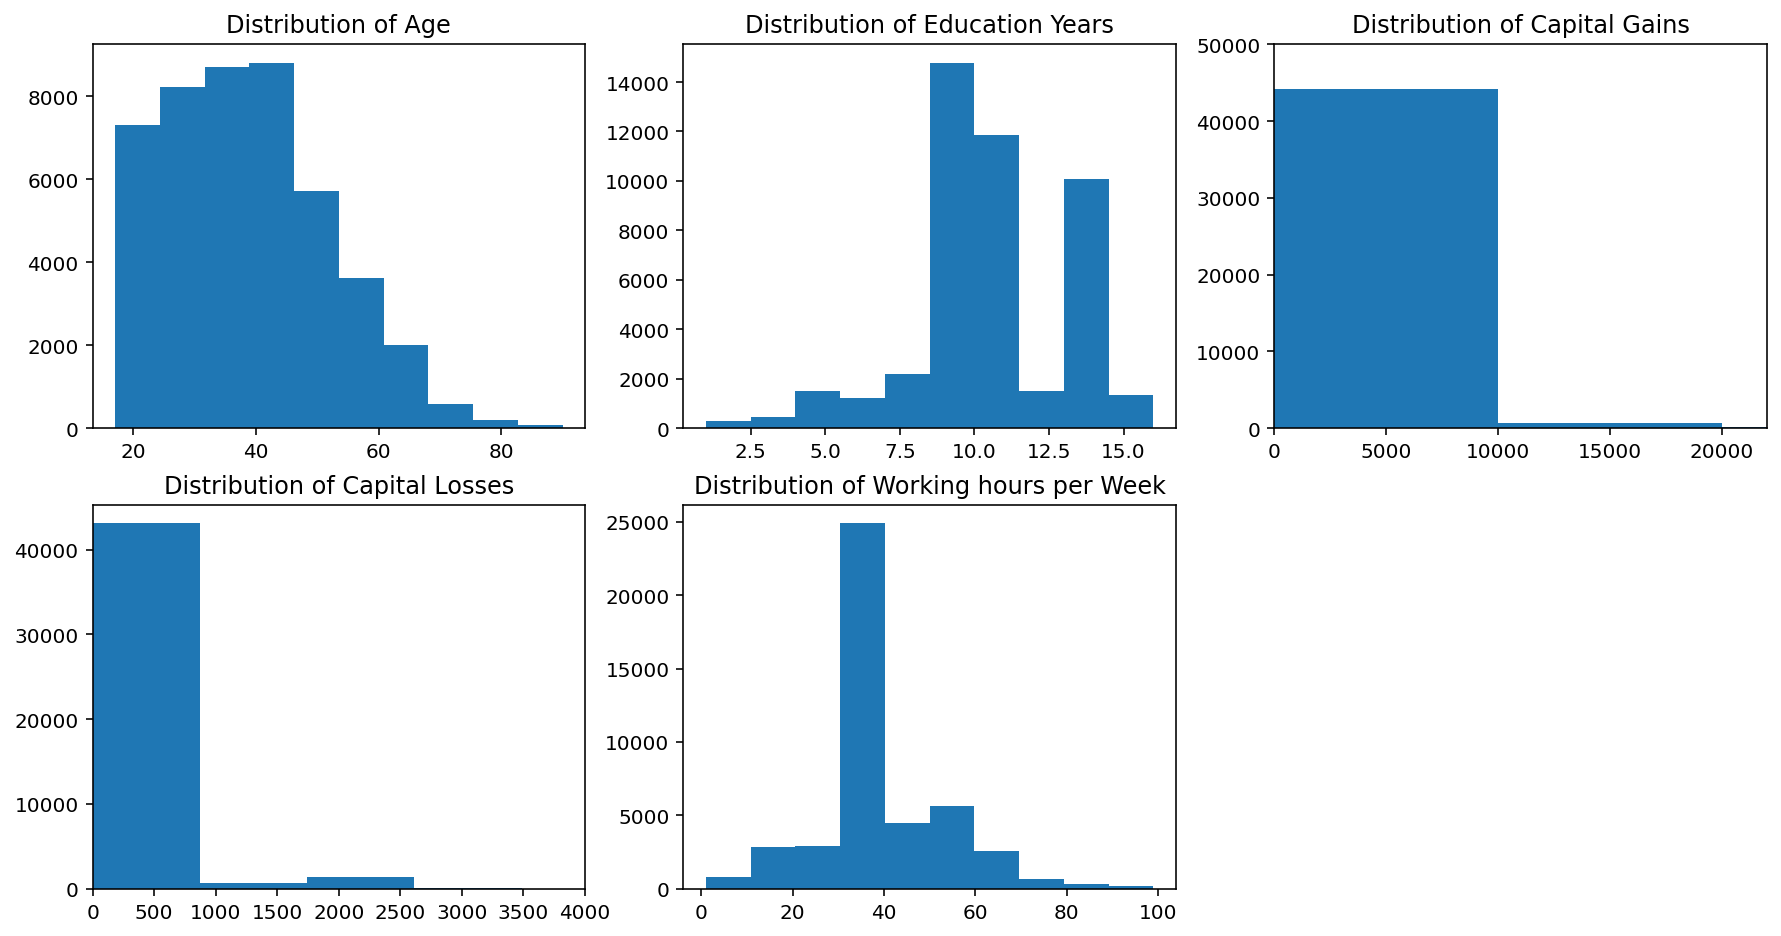

In [41]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
plt.hist(data['age'])
plt.title('Distribution of Age')

plt.subplot(3,3,2)
plt.hist(data['education-num'])
plt.title('Distribution of Education Years')

plt.subplot(3,3,3)
plt.hist(data['capital-gain'])
plt.xlim([0, 22000])
plt.ylim([0, 50000])
plt.title('Distribution of Capital Gains')

plt.subplot(3,3,4)
plt.hist(data['capital-loss'], bins = 5)
plt.xlim([0, 4000])
plt.title('Distribution of Capital Losses')

plt.subplot(3,3,5)
plt.hist(data['hours-per-week'])
plt.title('Distribution of Working hours per Week')

## **Creation of the Noisy Features** $^1$


In [42]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [43]:
#education level and number of education years represent the same quantity. 
#Dropping education level, number of education years represents education level when label encoded. 
data.drop(['education_level'], axis = 1,inplace =True)


In [44]:
#encoding income attribute to 1 for income above 50k. Storing target series in a separate variable
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0 )
target = data['income']
data.drop(['income'],axis=1,inplace=True)

## **Training and Splitting of the dataset.**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)


In [47]:
#preprocessing numberical features 
#transforming skewed continous features - capital gain and capital losses 

data['capital-gain']=data['capital-gain'].apply(lambda x: np.log(x+1))
data['capital-loss']=data['capital-loss'].apply(lambda x: np.log(x+1))

#scaling numerical features so that all features are treated equally by the model
scale_features = ['age','education-num','capital-gain','capital-loss','hours-per-week']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[scale_features] = scaler.fit_transform(data[scale_features])

#one hot encoding fot categorical features
encoded_features = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
data = pd.get_dummies(data,columns = encoded_features ,prefix = encoded_features, drop_first=True)
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_above_50k,income_below_50k,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **Building the Binary classification model**
The Model was created using the RandomForest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Binary Classification using the Random Forest

In [49]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [50]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## **Computation of the Prediction probabilities** $^2$

In [51]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [52]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

## **Computation of the curve values**

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC (AU-Area Under the ROC Curve)**

In [54]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### **Print AUROC scores**

In [55]:
print('Random (chance) Prediction: AUROC = %.5f' % (r_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))
print('Naive Bayes: AUROC = %.5f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.50000
Random Forest: AUROC = 0.86259
Naive Bayes: AUROC = 0.99324


### **Calculate ROC curve**

In [56]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

## **Plot the ROC curve**

In [57]:
import matplotlib.pyplot as plt

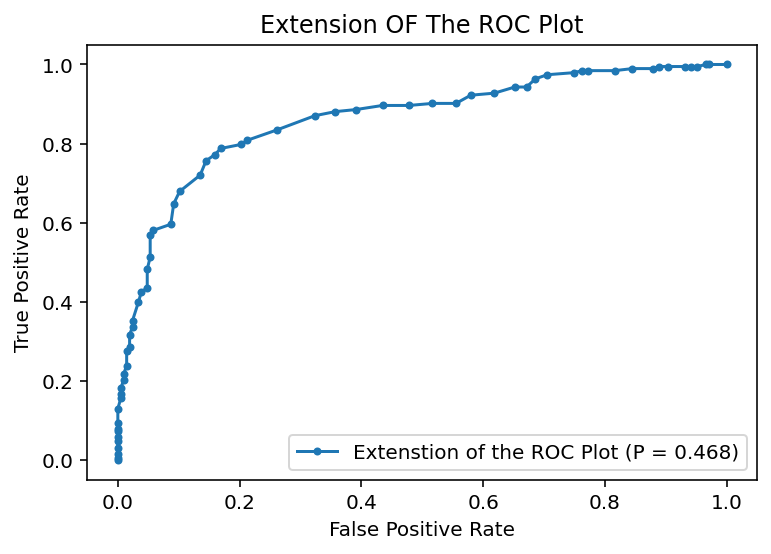

In [58]:

plt.plot(rf_fpr, rf_tpr, marker='.', label='Extenstion of the ROC Plot (P = 0.468)' % rf_auc)


# Title
plt.title('Extension OF The ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

---